In [21]:
%pylab inline 
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [22]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [23]:
# Define all categories 
categories = ['alt.atheism',
              'comp.graphics',
              'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware',
              'comp.windows.x',
              'misc.forsale',
              'rec.autos',
              'rec.motorcycles',
              'rec.sport.baseball',
              'rec.sport.hockey',
              'sci.crypt',
              'sci.electronics',
              'sci.med',
              'sci.space',
              'soc.religion.christian',
              'talk.politics.guns',
              'talk.politics.mideast',
              'talk.politics.misc',
              'talk.religion.misc']


In [24]:
# Spliting training set and test set 
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [31]:
# Let's look in sample data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [26]:
len(train.data)

11314

In [33]:
# Creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train model with the training dataset
model.fit(train.data, train.target)
# Creating labels for the test data
pred_labels = model.predict(test.data)

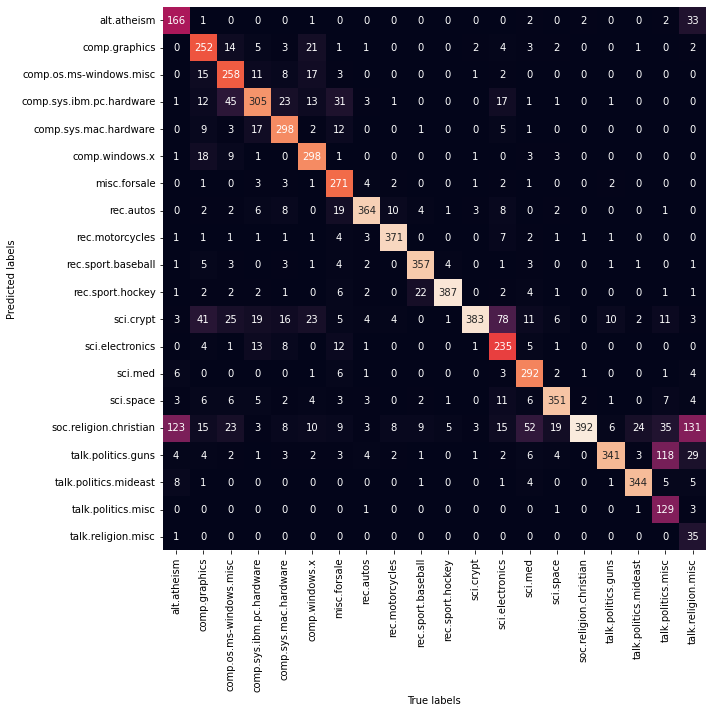

In [48]:
# Creating confusion matrix and heatmap 
cm = confusion_matrix(test.target, pred_labels)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False, 
            xticklabels=train.target_names, 
            yticklabels=train.target_names)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [49]:
# Predicting category on new data
def pred_category(string, train=train, model=model):
    pred = model.predict([string])
    return train.target_names[pred[0]]

In [55]:
pred_category('Bilayer lipid is composited of lipids, its mechanism is based on the diveristy of lipid compositions.')

'sci.crypt'